# Dominik Adamczyk
## Laboratorium 1 - rozwiązania 

#### 1. Zaimplementuj w Pythonie algorytmy wyszukiwania wzorców

##### Naiwny

In [61]:
def naive_string_matching(text, pattern):
    results = []
    for s in range(len(text) - len(pattern) + 1):
        if text[s:s+len(pattern)] == pattern:
            results.append(s)
    return results

### Algorytm KMP

In [62]:
def prefix_function(pattern):
    pi = [0]
    k = 0
    for q in range(1, len(pattern)):
        while (k > 0 and pattern[k] != pattern[q]):
            k = pi[k-1]
        if pattern[k] == pattern[q]:
            k = k+1
        pi.append(k)
    return pi

def kmp_string_matching(text, pattern, pi):
    q = 0
    results = []
    for i in range(0, len(text)):
        while q > 0 and pattern[q] != text[i]:
            q = pi[q-1]
        if pattern[q] == text[i]:
            q = q + 1
        if q == len(pattern):
            results.append(i - q + 1)
            q = pi[q-1]
    return results

#### Automat skończony


In [63]:
def transition_table(pattern, alphabet):
    result = []
    for q in range(0, len(pattern) + 1):
        # print(q)
        result.append({})
        for a in set(alphabet):
            k = min(len(pattern) + 1, q + 2)
            while True:
                k = k - 1
                if (k == 0 or pattern[:k] == (pattern[:q] + a)[-k:]):
                    break
            result[q][a] = k
    return result

def fa_string_matching(text, delta):
    q = 0
    results = []
    length = len(delta) - 1
    for i in range(0, len(text)):
        q = delta[q][text[i]]
        if q == length:
            results.append(i - q + 1)
    return results

#### 2. Zaimplementuj testy porównujące szybkość działania wyżej wymienionych algorytmów, z rozbiciem na czasu pre-processingu oraz czas wyszukiwania wzorca w tekście

In [64]:
from time import time
import pandas as pd

def test_naive(text, pattern):
    t = time()
    naive_string_matching(text, pattern)
    return 0, time() - t

def test_kmp(text, pattern):
    t = time()
    pf = prefix_function(pattern)
    preprocess_time = time() - t
    t = time()
    kmp_string_matching(text, pattern, pf)
    return preprocess_time, time() - t

def test_fa(text, pattern):
    t = time()
    tt = transition_table(pattern, text)
    preprocess_time = time() - t
    t = time()
    fa_string_matching(text, tt)
    return preprocess_time, time() - t

def test_all(text, pattern, n):
    df = pd.DataFrame({"Algorithm": [], "Preprocess_time" : [],
                    "Search_time" : [], "Full_time" : []})
    for i in range(n):
        naive_pre, naive_sear = test_naive(text, pattern)
        kmp_pre, kmp_sear = test_kmp(text, pattern)
        fa_pre, fa_sear = test_fa(text, pattern)
        new_rows = pd.DataFrame({"Algorithm": ["Naive", "KMP", "Finite_automata"],
                              "Preprocess_time" : [naive_pre, kmp_pre, fa_pre],
                              "Search_time" : [naive_sear, kmp_sear, fa_sear],
                              "Full_time" : [naive_pre+naive_sear, kmp_pre+kmp_sear, fa_pre+fa_sear]})
        df = pd.concat([df, new_rows], ignore_index=True)
    return df

def check_ans(text, pattern):
    return fa_string_matching(text, transition_table(pattern, text)) == \
        naive_string_matching(text, pattern) == kmp_string_matching(text, pattern, prefix_function(pattern))

In [65]:
import random
import string
def generate_random_string(l):
    return ''.join(random.choice(string.ascii_letters
                                 + string.digits) for _ in range(l))

Test 1.

In [66]:
text_r1 = generate_random_string(10000000)
pattern_r1 = generate_random_string(3)

In [67]:
print(f'Same results: {check_ans(text_r1, pattern_r1)}')
result_r1 = test_all(text_r1, pattern_r1, 10)

Same results: True


In [68]:
means = result_r1.groupby('Algorithm').agg({'Preprocess_time':['mean', 'min', 'max'],
                                     'Search_time':['mean', 'min', 'max'],
                                     'Full_time':['mean', 'min', 'max']})
means


Preprocess_time                    Search_time            \
                           mean       min      max        mean       min   
Algorithm                                                                  
Finite_automata        0.641211  0.561859  0.71614    0.960271  0.816609   
KMP                    0.000000  0.000000  0.00000    1.573955  1.415862   
Naive                  0.000000  0.000000  0.00000    1.649673  1.560097   

                          Full_time                      
                      max      mean       min       max  
Algorithm                                                
Finite_automata  1.054761  1.601482  1.378468  1.770901  
KMP              1.886617  1.573955  1.415862  1.886617  
Naive            1.760026  1.649673  1.560097  1.760026

Test 2.

In [69]:
text_r2 = generate_random_string(10000000)
pattern_r2 = generate_random_string(100)

In [70]:
print(f'Same results: {check_ans(text_r2, pattern_r2)}')
result_r2 = test_all(text_r2, pattern_r2, 10)

Same results: True


In [71]:
means = result_r2.groupby('Algorithm').agg({'Preprocess_time':['mean', 'min', 'max'],
                                     'Search_time':['mean', 'min', 'max'],
                                     'Full_time':['mean', 'min', 'max']})
means

Preprocess_time                       Search_time            \
                           mean        min        max        mean       min   
Algorithm                                                                     
Finite_automata       18.050463  16.682831  18.988019    1.117830  0.971991   
KMP                    0.000000   0.000000   0.000000    1.725684  1.544949   
Naive                  0.000000   0.000000   0.000000    1.986432  1.666569   

                           Full_time                        
                      max       mean        min        max  
Algorithm                                                   
Finite_automata  1.330893  19.168293  17.700536  20.199029  
KMP              1.958363   1.725684   1.544949   1.958363  
Naive            2.279327   1.986432   1.666569   2.279327

Test 3.

In [72]:
text_r3 = ((('abcdefgh' + 'hgfedcba' ) * 2 + 'abcedefgd') * 3 + '12aedafga') * 10000
pattern_r3 = 'defgh'

In [73]:
print(f'Same results: {check_ans(text_r3, pattern_r3)}')
result_r3 = test_all(text_r3, pattern_r3, 30)

Same results: True


In [74]:
means = result_r3.groupby('Algorithm').agg({'Preprocess_time':['mean', 'min', 'max'],
                                     'Search_time':['mean', 'min', 'max'],
                                     'Full_time':['mean', 'min', 'max']})
means

Preprocess_time                     Search_time            \
                           mean       min       max        mean       min   
Algorithm                                                                   
Finite_automata        0.105471  0.055988  0.148165    0.164296  0.117072   
KMP                    0.000039  0.000000  0.001166    0.310159  0.221014   
Naive                  0.000000  0.000000  0.000000    0.273106  0.214942   

                          Full_time                      
                      max      mean       min       max  
Algorithm                                                
Finite_automata  0.233244  0.269768  0.216115  0.344591  
KMP              0.440359  0.310198  0.221014  0.440359  
Naive            0.355323  0.273106  0.214942  0.355323

Test 4.

In [75]:
text_r4 = generate_random_string(100000000)
pattern_r4 = generate_random_string(1000)

In [76]:
print(f'Same results: {check_ans(text_r2, pattern_r2)}')
result_r4 = test_all(text_r2, pattern_r2, 5)

Same results: True


In [77]:
means = result_r4.groupby('Algorithm').agg({'Preprocess_time':['mean', 'min', 'max'],
                                     'Search_time':['mean', 'min', 'max'],
                                     'Full_time':['mean', 'min', 'max']})
means

Preprocess_time                      Search_time            \
                           mean        min       max        mean       min   
Algorithm                                                                    
Finite_automata       15.093517  14.639752  15.88757    0.864505  0.743550   
KMP                    0.000000   0.000000   0.00000    1.448435  1.358719   
Naive                  0.000000   0.000000   0.00000    1.624741  1.518801   

                           Full_time                        
                      max       mean        min        max  
Algorithm                                                   
Finite_automata  0.983538  15.958022  15.500485  16.871108  
KMP              1.512715   1.448435   1.358719   1.512715  
Naive            1.766956   1.624741   1.518801   1.766956

#### 3. Znajdź wszystkie wystąpienia wzorców "pan" oraz "pani" w załączonym pliku, za pomocą każdego algorytmu. W raporcie zamieść liczbę dopasowań każdego ze wzorców osobno dla każdego algorytmu. Upewnij się, że każdy algorytm zwraca taką samą liczbę dopasowań

In [78]:
file = open("pan-tadeusz.txt", "r")
pan_tadeusz = file.read()
file.close()

In [79]:
pattern1 = "pan"
pattern2 = "pani"

pan_naive = naive_string_matching(pan_tadeusz, pattern1)
pan_kmp = kmp_string_matching(pan_tadeusz, pattern1, prefix_function(pattern1))
pan_fa = fa_string_matching(pan_tadeusz, transition_table(pattern1, pan_tadeusz))

pani_naive = naive_string_matching(pan_tadeusz, pattern2)
pani_kmp = kmp_string_matching(pan_tadeusz, pattern2, prefix_function(pattern2))
pani_fa = fa_string_matching(pan_tadeusz, transition_table(pattern2, pan_tadeusz))

print(f"""Number of occurrences of word \"pan\":
Naive algorithm:           {len(pan_naive)}
kmp algorithm:             {len(pan_kmp)}
finite automata algorithm: {len(pan_fa)}
Same results:n             {pan_naive == pan_kmp == pan_fa}\n""")

print(f"""Number of occurrences of word \"pani\":
Naive algorithm:           {len(pani_naive)}
kmp algorithm:             {len(pani_kmp)}
finite automata algorithm: {len(pani_fa)}
Same results:              {pani_naive == pani_kmp == pani_fa}\n""")

Number of occurrences of word "pan":
Naive algorithm:           401
kmp algorithm:             401
finite automata algorithm: 401
Same results:n             True

Number of occurrences of word "pani":
Naive algorithm:           100
kmp algorithm:             100
finite automata algorithm: 100
Same results:              True



#### 4. Porównaj szybkość działania algorytmów dla problemu z p. 3, z uwzględnieniem czasu pre-processingu oraz czasu dopasowania. Pomiar czasu powinien być przeprowadzony co najmniej 5-krotnie i przedstawione w formie tabeli oraz wykresu, uwzględniającego czas minimalny, maksymalny oraz średni czas 

In [80]:
df = test_all(pan_tadeusz, "pan", 100) # 100 pomiarow

In [81]:
means = df.groupby('Algorithm').agg({'Preprocess_time':['mean', 'min', 'max'],
                                     'Search_time':['mean', 'min', 'max'],
                                     'Full_time':['mean', 'min', 'max']})
means


Preprocess_time                     Search_time            \
                           mean       min       max        mean       min   
Algorithm                                                                   
Finite_automata        0.026247  0.018918  0.041429    0.041326  0.030990   
KMP                    0.000010  0.000000  0.001000    0.064187  0.047993   
Naive                  0.000000  0.000000  0.000000    0.071302  0.061999   

                          Full_time                      
                      max      mean       min       max  
Algorithm                                                
Finite_automata  0.084948  0.067574  0.050000  0.115048  
KMP              0.087974  0.064197  0.047993  0.087974  
Naive            0.094291  0.071302  0.061999  0.094291

<AxesSubplot:title={'center':'Mean Times of Execution of Pattern Matching Algorithms'}, xlabel='Algorithm', ylabel='Time [s]'>

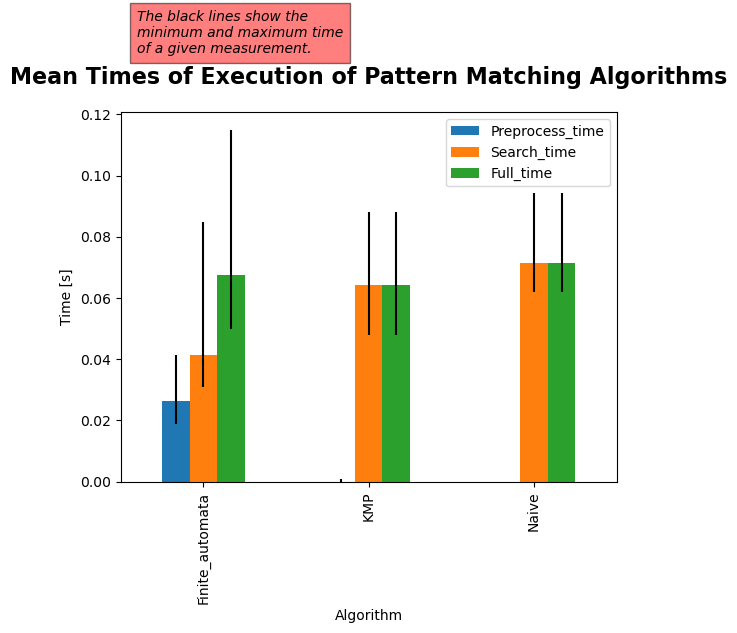

In [82]:
import matplotlib.pyplot as plt
import numpy as np
grouped = df.groupby('Algorithm')
means = grouped.mean()
mins = grouped.min().to_numpy()
maxs = grouped.max().to_numpy()
meansnp = means.to_numpy()
maxs = maxs - means
mins = means - mins
errs = np.dstack((mins,maxs))
errs = np.transpose(errs, (1, 2, 0))

fig, ax = plt.subplots()
ax.set_title('Mean Times of Execution of Pattern Matching Algorithms', fontsize=16, fontweight='bold', pad=20)
# ax.annotate(xytext=(2.5, 2), text = 'The black lines show the minimum and maximum time of a given measurement', xy=(0.06,0.01))
ax.text(-0.4, 0.14, 'The black lines show the\nminimum and maximum time\nof a given measurement.', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
ax.set_ylabel('Time [s]')
means.plot.bar(yerr=errs, ax = ax)


#### 5. Zaproponuj tekst oraz wzorzec, dla którego zmierzony czas działania algorytmów 2 oraz 3 (uwzględniający tylko dopasowanie, bez pre-processingu) będzie co najmniej 5-krotnie krótszy niż dla algorytmu naiwnego. Uruchom każdy algorytm na zadanym wzorcu i tekście, w celu sprawdzenia, czy zmierzony czas jest faktycznie co najmniej 5-krotnie krótszy

In [83]:
# Proponowany tekst oraz wzorzec do znalezienia w tekście.
# Tekst i wzorzec w wielu miejscach się pokrywają, co daje
# niekorzystny przypadek dla algorytmu naiwnego.

text_5x = "aab" * 1500000
pattern_5x = "aab" * 14000

print(test_kmp(text_5x, pattern_5x))
print(test_naive(text_5x, pattern_5x))

(0.008989095687866211, 1.2798304557800293)
(0, 8.139204978942871)


In [84]:
result_5x = test_all(text_5x, pattern_5x, 1)
result_5x

,Algorithm,Preprocess_time,Search_time,Full_time
0,Naive,0.000000,7.999067,7.999067
1,KMP,0.009582,1.291328,1.300910
2,Finite_automata,3740.645034,0.656945,3741.301979


In [85]:
naive_search = result_5x.iloc[0, 2]
kmp_search = result_5x.iloc[1, 2]
finite_search = result_5x.iloc[2, 2]
print("Are search times of KMP and finite automata at least 5x faster than naive:", 
      finite_search * 5 < naive_search and kmp_search * 5 < naive_search)

Are search times of KMP and finite automata at least 5x faster than naive: True


#### 6. Przedstaw wnioski wynikające z przeprowadzonych eksperymentów, ze szczególnym uwzględnieniem praktycznych konsekwencji wynikających z różnic pomiędzy zaimplementowanymi algorytmami

Skuteczne używanie algorytmów dopasowywania wzorców wymaga ich świadomego wyboru. Każdy z algorytmów posiada swoje unikalne cechy:

* Naiwny: łatwy w implementacji, wystarczający do wyszukiwania w niewielkich danych, w których występuje duża różnorodność liter. Gdy w zadanym tekście wzorzec (albo jego duża początkowa część) powtarza się często (i jego długość jest zależna od długości tekstu) algorytm staje się wysoce nieoptymalny osiągając czas rzędu O(n**2)
* KMP: W ogólnym przypadku najszybszy algorytm, który eliminuje problemy występujące w algorytmie naiwnym. Przy tekstach różnorodnych (np losowe litery jak w przykładach) jest nieznacznie szybszy od naiwnego, natomiast nie ma problemu z możliwą kwadratową złożonością obliczeniową, który występuje w poprzednio omawianym algorytmie. Czas preprocessingu jest bardzo krótki, gdyż wymaga jedynie liniowego przejścia po tablicy ze wzorcem. 
* Automat skończony: algorytm specyficzny biorąc pod uwagę jego właściwości. Czas wyszukiwania wzorca w tekście przy pomocy tego algorytmu jest najszybszy w każdym z przypadków, jednak preprocessing sprawia, że nie jest to optymalny wybór w większości przypadków. Tworzenie tablicy przejść ma złożoność O(n**3*|Σ|), gdzie n to długość wzorca, a |Σ| to ilość znaków w alfabecie. Sprawia to, że preprocessing jest zauważalnie wolniejszy od tego z algorytmu KMP, a niejednokrotnie będzie wolniejszy od czasu wyszukiwania w algorytmie naiwnym. Jeżeli jednak bierzemy tylko i wyłącznie czas wyszukiwania, to algorytm automatu skończonego jest najszybszy - w końcu to tylko liniowe przejście po tablicy z tekstem. Moim zdaniem algorytmu warto używać, gdy dany problem wymaga pojedynczego utworzenia tablicy przejść, a następnie używania tej tablicy dla wielu różnych tekstów (czyli gdy nasz wzorzec się nie zmienia). W innych wypadkach bardziej opłacalne jest używanie algorytmu KMP (szczególnie gdy wzorzec jest długi), lub nawet algorytmu naiwnego.